In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np

In [80]:
def dfmt_weekyear(dt_isotuple):
    return f'{dt_isotuple.year}W{dt_isotuple.week}'

In [81]:
df = pd.read_csv('../output/input.csv')
df['first_positive_test_date'] = pd.to_datetime(df.first_positive_test_date)
df = df[(df.covid_admission==0)&(df.covid_emergency_admission==0)&(df.first_positive_test_date.notna())&(df.with_consultation==1)]
#df['format_date'] = df.apply(lambda x: dfmt_weekyear(x.first_positive_test_date.isocalendar()),axis=1)
df['format_date'] = df.first_positive_test_date.dt.strftime('%YW%W')

In [ ]:
if not os.path.exists('../output/figures'):
    os.makedirs('../output/figures')

In [90]:
df.pivot_table(values=['with_consultation','budesonide_prescription'],aggfunc=np.sum,index=['imd','ethnicity','region','sex'])

budesonide_prescription  \
imd ethnicity region                   sex                            
1   1.0       North East               F                          0   
              South East               F                          0   
                                       M                          1   
    2.0       London                   M                          0   
    3.0       North West               M                          1   
    4.0       North East               M                          1   
              West Midlands            F                          1   
    5.0       London                   F                          0   
2   1.0       North East               F                          2   
    3.0       North East               M                          0   
              North West               F                          0   
              South East               M                          0   
              West Midlands            F                          0   
    4.0       East Midlands            M                          0   
              London                   F                          0   
    5.0       South East               F                          1   
3   1.0       North West               F                          2   
    3.0       South East               M                          1   
              West Midlands            M                          0   
    4.0       London                   M                          0   
              Yorkshire and the Humber M                          0   
    5.0       East Midlands            F                          2   
              North East               F                          0   
4   1.0       London                   M                          0   
              South East               M                          0   
    2.0       London                   F                          0   
              South East               F                          0   
              Yorkshire and the Humber F                          0   
    3.0       East Midlands            F                          0   
              South East               F                          1   
              West Midlands            M                          0   
              Yorkshire and the Humber F                          0   
    4.0       East Midlands            M                          0   
              London                   F                          0   
              South East               F                          0   
                                       M                          0   
    5.0       North West               M                          2   
5   1.0       North West               F                          0   
    2.0       West Midlands            M                          0   
    3.0       London                   F                          0   
              Yorkshire and the Humber M                          2   
    4.0       North West               M                          0   
    5.0       South East               F                          1   

                                            with_consultation  
imd ethnicity region                   sex                     
1   1.0       North East               F                    1  
              South East               F                    1  
                                       M                    1  
    2.0       London                   M                    1  
    3.0       North West               M                    1  
    4.0       North East               M                    1  
              West Midlands            F                    1  
    5.0       London                   F                    1  
2   1.0       North East               F                    1  
    3.0       North East               M                    1  
              North West               F                    1  
              So

In [82]:
df_plt = df.groupby(['format_date','budesonide_prescription']).count()['patient_id'].reset_index()

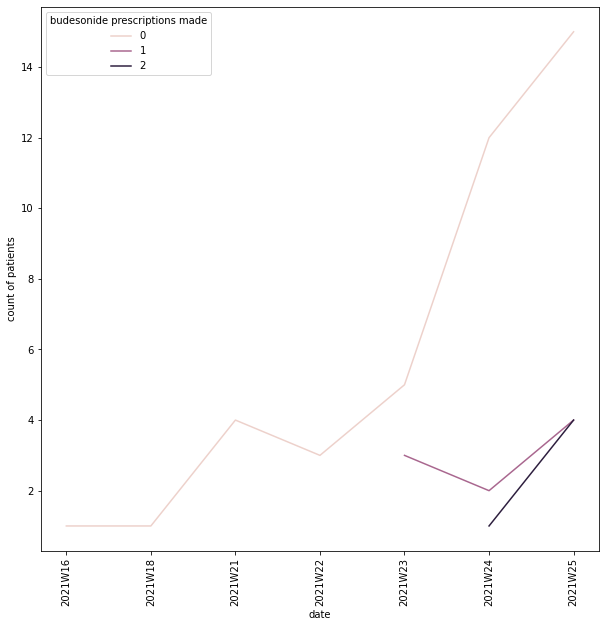

In [83]:
plt.rcParams['figure.figsize'] = (10,10)
sns.lineplot(data=df_plt,x='format_date',y='patient_id',hue='budesonide_prescription')
plt.ylabel('count of patients')
plt.xlabel('date')
plt.xticks(rotation=90)
plt.legend(title='budesonide prescriptions made')

plt.savefig('../output/figures/prescriptions_over_time_all.png')

In [84]:
def plot_by_variable(varname):
    df_plt = df.groupby(['format_date','budesonide_prescription',varname]).count()['patient_id'].reset_index()
    g= sns.FacetGrid(df_plt,row=varname,hue="budesonide_prescription",height = 2,aspect=4)
    g.map(sns.lineplot,'format_date','patient_id')
    g.set_axis_labels('date','count of patients')
    plt.xticks(rotation=90)
    g.add_legend(title='budesonide prescriptions made')

    plt.savefig(f'../output/figures/prescriptions_over_time_by_{varname}.png')

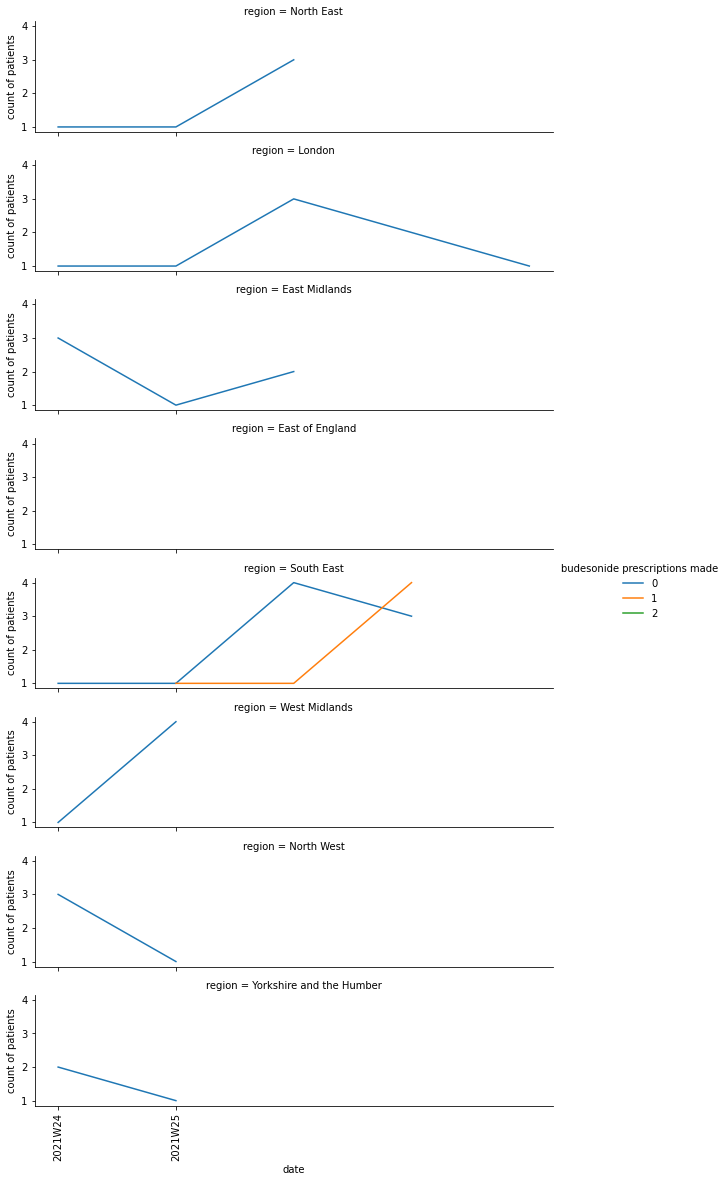

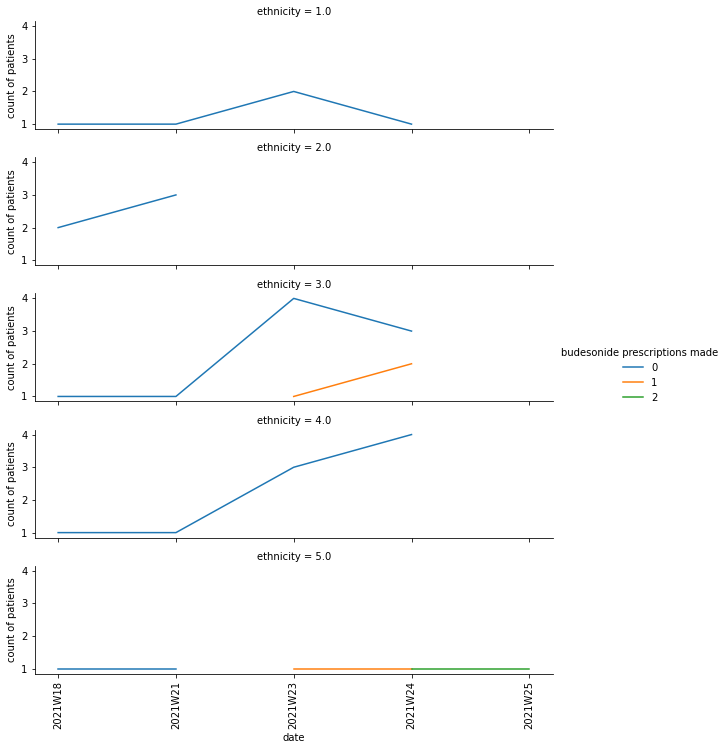

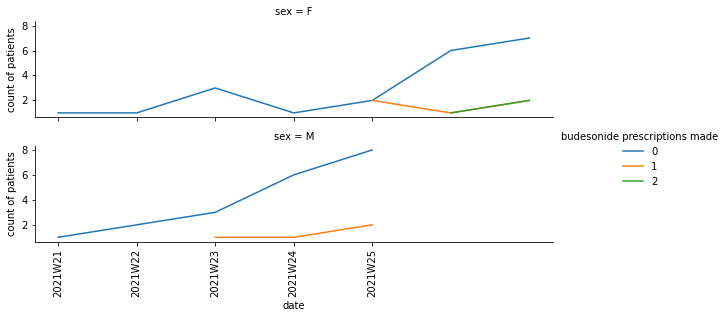

In [85]:
plot_by_variable('region')
plot_by_variable('ethnicity')
plot_by_variable('sex')